### Preprocessing round aperature few-tilt precession data

''A Sequential Few-Tilt Approach to Precession 4D-STEM''

Stephanie M. Ribet [1], Rohan Dhall [1], Colin Ophus [2], Karen C. Bustillo [1]

[1] National Center for Electron Microscopy, Molecular Foundry, Lawrence Berkeley National Laboratory

[2] Department of Materials Science and Engineering, Stanford University


In [1]:
import numpy as np
import py4DSTEM
from emdfile import tqdmnd
import matplotlib.pyplot as plt
from skimage.registration import phase_cross_correlation

cupyx.jit.rawkernel is experimental. The interface can change in the future.


### define file paths

In [2]:
data_path = ''
file_path_0 = data_path + 'al_36_master.h5'
file_path_1 = data_path + 'al_37_master.h5'
file_path_2 = data_path + 'al_38_master.h5'
file_path_3 = data_path + 'al_39_master.h5'
file_path_4 = data_path + 'al_40_master.h5'
file_path_c = data_path + 'al_42_master.h5'

### load first dataset

In [3]:
dc0 = py4DSTEM.import_file(file_path_0)

Dataset is uint32 but will be converted to uint16


In [7]:
dc0.get_dp_mean()

VirtualDiffraction( A 2-dimensional array of shape (192, 192) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)

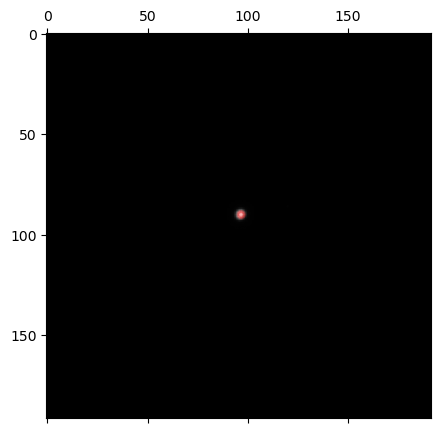

In [8]:
probe_semiangle, probe_qx0, probe_qy0 = dc0.get_probe_size(
    plot = True,
    # thresh_upper=0.12
)

### center datasets 

In [9]:
def load_and_center_datacube(
    file_path
):
    dc1 = py4DSTEM.import_file(file_path).bin_R(2).bin_Q(2)
    (qx0, qy0, _) = py4DSTEM.process.calibration.get_origin(
        dc1,
        # r = 2.0,
        rscale = 1.2,
    )
    qx0[np.isnan(qx0)] = np.mean(qx0[~np.isnan(qx0)])
    qy0[np.isnan(qy0)] = np.mean(qy0[~np.isnan(qy0)])
    (qx0_fit, qy0_fit, qx0_res, qy0_res) = py4DSTEM.process.calibration.fit_origin(
        (qx0, qy0),
    )

    
    dc1.data = np.asarray(dc1.data, dtype = "float")
    for a0, a1 in tqdmnd(
        dc1.Rshape[0],
        dc1.Rshape[1],
        desc="aligning",
        unit="DP",
        unit_scale=True,
    ):
        dc1.data[a0,a1] = py4DSTEM.process.utils.get_shifted_ar(
            dc1.data[a0,a1],
            xshift=(96/2 - qx0_fit[a0,a1]),
            yshift=(96/2 - qy0_fit[a0,a1]),
            bilinear=True
        )
    return dc1

         

In [10]:
dc0 = load_and_center_datacube(file_path_0)
dc1 = load_and_center_datacube(file_path_1)
dc2 = load_and_center_datacube(file_path_2)
dc3 = load_and_center_datacube(file_path_3)
dc4 = load_and_center_datacube(file_path_4)


Dataset is uint32 but will be converted to uint16


Finding origins: 100%|████████████████████| 65.5k/65.5k [00:18<00:00, 3.48kDP/s]
aligning: 100%|███████████████████████████| 65.5k/65.5k [00:05<00:00, 11.7kDP/s]


Dataset is uint32 but will be converted to uint16


Finding origins: 100%|████████████████████| 65.5k/65.5k [00:18<00:00, 3.58kDP/s]
aligning: 100%|███████████████████████████| 65.5k/65.5k [00:05<00:00, 13.0kDP/s]


Dataset is uint32 but will be converted to uint16


Finding origins: 100%|████████████████████| 65.5k/65.5k [00:18<00:00, 3.54kDP/s]
aligning: 100%|███████████████████████████| 65.5k/65.5k [00:05<00:00, 12.1kDP/s]


Dataset is uint32 but will be converted to uint16


Finding origins: 100%|████████████████████| 65.5k/65.5k [00:18<00:00, 3.47kDP/s]
aligning: 100%|███████████████████████████| 65.5k/65.5k [00:05<00:00, 12.7kDP/s]


Dataset is uint32 but will be converted to uint16


Finding origins: 100%|████████████████████| 65.5k/65.5k [00:18<00:00, 3.51kDP/s]
aligning: 100%|███████████████████████████| 65.5k/65.5k [00:05<00:00, 12.4kDP/s]


### make virtual images and mean diffraction patterns

100%|██████████████████████████████████| 65536/65536 [00:00<00:00, 81042.88it/s]


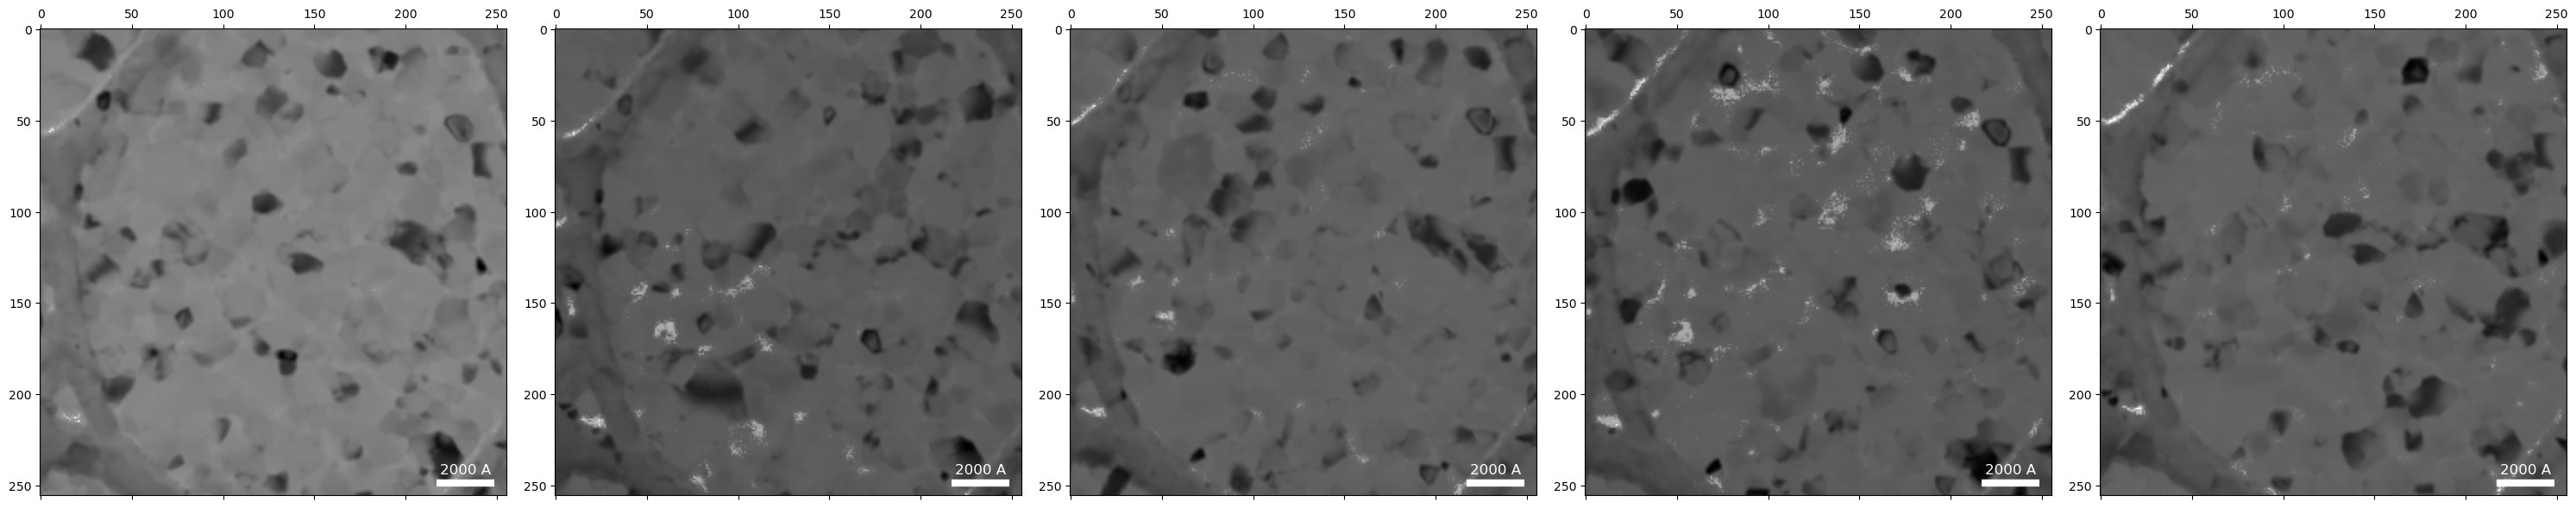

In [20]:
probe_semiangle =1
geometry = ((77,75), probe_semiangle+5)
mode = "circular"
name = "DF"


geometry = ((96/2,96/2), (probe_semiangle + 1, (probe_semiangle + 5) * 5))
mode = "annular"

geometry = ((96/2,96/2 ), probe_semiangle+5)
mode = "circular"

dc0.get_virtual_image(
    geometry = geometry,
    mode = mode,
    name = name 
)



dc1.get_virtual_image(
    geometry = geometry,
    mode = mode,
    name = name 
    
)
dc2.get_virtual_image(
    geometry = geometry,
    mode = mode,
    name = name 
    
)
dc3.get_virtual_image(
    geometry = geometry,
    mode = mode,
    name = name 
    
)
dc4.get_virtual_image(
    geometry = geometry,
    mode = mode,
    name = name 
    
)

py4DSTEM.show(
    [
        dc0.tree('DF'),
        dc1.tree('DF'),
        dc2.tree('DF'),
        dc3.tree('DF'),
        dc4.tree('DF'),
        
    ],
    vmax =1,
    vmin = 0
    
)

In [12]:
dc0.get_dp_mean()
dc1.get_dp_mean()
dc2.get_dp_mean()
dc3.get_dp_mean()
dc4.get_dp_mean()

VirtualDiffraction( A 2-dimensional array of shape (96, 96) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)

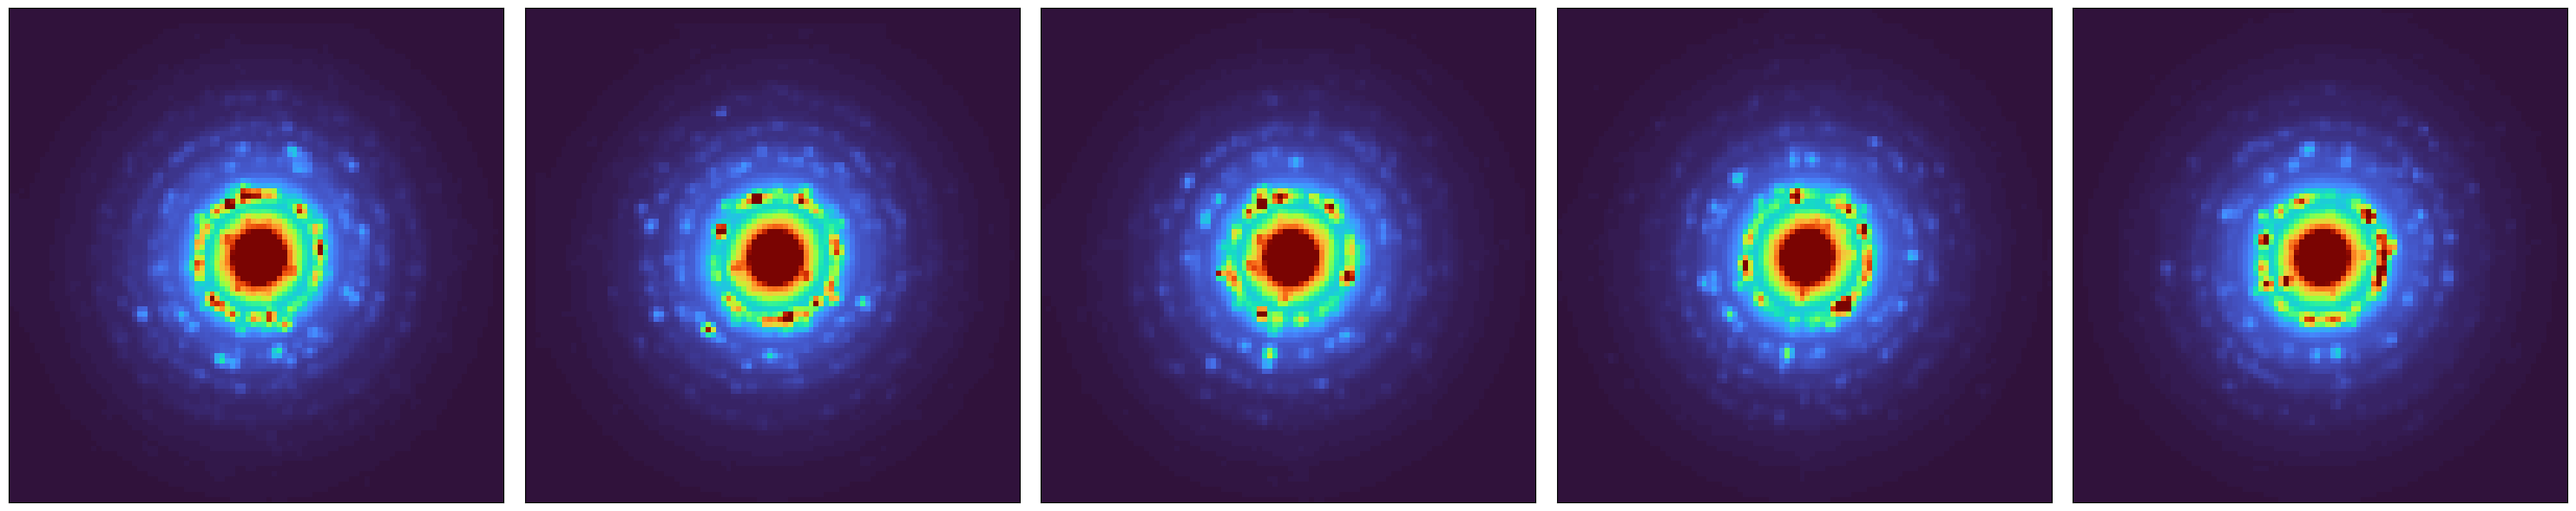

In [13]:
fig, ax = py4DSTEM.show(
    [
        dc0.tree('dp_mean'),
        dc2.tree('dp_mean'),
        dc3.tree('dp_mean'),
        dc1.tree('dp_mean'),
        dc4.tree('dp_mean')
        
    ],
    ticks = False,
    scalebar = False,
    returnfig=True,
    vmax = 0.99,
    cmap  = "turbo"
)

plt.tight_layout()
# plt.savefig('DPs_gold.pdf', bbox_inches = "tight")


### combine datasets



In [30]:
shifts = np.zeros((5,2))

mask = np.zeros((256,256))
mask[0:150] = 1

shifts[1]= phase_cross_correlation(
    dc0.tree('DF').data,
    dc1.tree('DF').data,
    # reference_mask = mask
)[0]

shifts[2]=  phase_cross_correlation(
    dc0.tree('DF').data,
    dc2.tree('DF').data,
    reference_mask = mask
)[0]


shifts[3]=  phase_cross_correlation(
    dc0.tree('DF').data,
    dc3.tree('DF').data,
    reference_mask = mask
)[0]

shifts[4]=  phase_cross_correlation(
    dc0.tree('DF').data,
    dc4.tree('DF').data,
    reference_mask = mask
)[0]


shifts = np.asarray(shifts, dtype = "int")

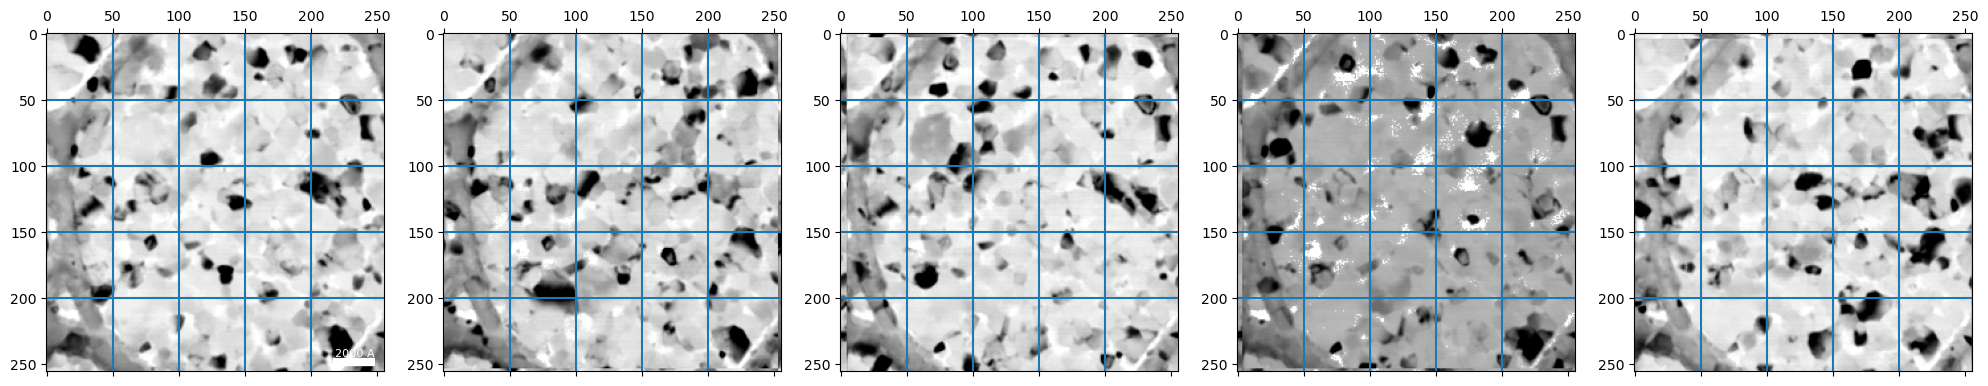

In [31]:
fig, ax= py4DSTEM.show(
    [
        dc0.tree('DF'),
        np.roll(dc1.tree('DF').data,shift=shifts[1], axis=(0,1)),
        np.roll(dc2.tree('DF').data,shift=shifts[2], axis=(0,1)),
        np.roll(dc3.tree('DF').data,shift=shifts[3], axis=(0,1)),
        np.roll(dc4.tree('DF').data,shift=shifts[4], axis=(0,1)),
        # np.roll(dc2.tree('DF').data,shift=shifts_manual[1], axis=(1,0)),
    ],
    returnfig=True,
    axsize = (4,4),
    
)

for axs in ax.flatten(): 
    axs.axhline(50, 0,100,)
    axs.axhline(100, 0,100,)
    axs.axhline(150, 0,100,)
    axs.axhline(200, 0,100,)

    axs.axvline(50, 0,100,)
    axs.axvline(100, 0,100,)
    axs.axvline(150, 0,100,)
    axs.axvline(200, 0,100,)

In [32]:
crop_x_min = np.min(shifts[:,0])
crop_x_max = np.max(shifts[:,0])
crop_x_range = crop_x_max -crop_x_min

crop_y_min = np.min(shifts[:,1])
crop_y_max = np.max(shifts[:,1])
crop_y_range = crop_y_max -crop_y_min


In [33]:
print(crop_x_min, crop_x_max, crop_y_min, crop_y_max)

-2 5 -3 5


In [34]:
dc_combined = np.zeros(
    (
        dc0.shape[0],
        dc0.shape[1],
        dc0.shape[2],
        dc0.shape[3],
    )
)

In [35]:
datacubes = [dc0, dc1, dc2, dc3, dc4]
for a0 in range(5): #range(shifts_manual.shape[0]):
    dc_combined = dc_combined + np.roll(
        datacubes[a0].data.copy(),
        shifts[a0], 
        axis = (0,1)
    )

In [36]:
BF = dc_combined.mean((2,3))

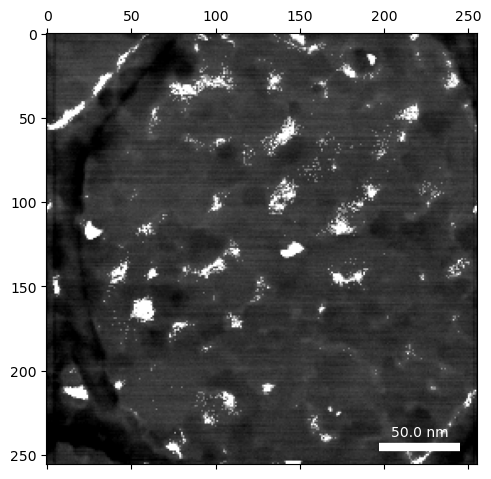

In [37]:
py4DSTEM.show(
    BF,
    scalebar = True,
    pixelsize = 1.035162,
    pixelunits= "nm"
    
)

In [38]:
dc_combined_cropped = dc_combined.copy()[
        crop_x_max:crop_x_min,
        crop_y_max:crop_y_min,
    ]

In [39]:
dc_combined_cropped_save = py4DSTEM.DataCube(
    data = dc_combined_cropped
    
)
py4DSTEM.save(
    'dc_combined_al_36_42.h5',
    dc_combined_cropped_save,
    "o"
    
)